In [1]:
import pandas as pd
import os
import random
import numpy as np
import sys
import gc
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import random
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold, RFE, SelectFromModel, SelectKBest, f_classif, chi2, mutual_info_classif
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import joblib
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle, class_weight
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
files= os.listdir('/home/dsa/Downloads/s3data')

In [4]:
def getNumericalAndCategorical(data):
    #get Numerical variables
    numeric_var_names = [key for key in dict(data.dtypes)
                         if dict(data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
    #get categorical variables
    cat_var_names = [key for key in dict(data.dtypes) if dict(data.dtypes)[key] not in ['float64', 'int64', 'float32', 'int32']]
    return [numeric_var_names, cat_var_names]
def list2Str(lst):
    try:
        if isinstance(lst, list):
        # print('true')
            return",".join(lst)
            # return tuple(lst)
        else:
            return lst
    except:
        print('Error in casting list: ', lst, sys.exc_info()[0])

In [5]:
def process_local_data(path,Limit_Features,n_files):
    lst_df = []
    lst_files =random.sample(files, n_files)
    count = 0
    feat = pd.read_excel(Limit_Features)
    print("Iteration Over Files, And Limitting with Imp features")
    date = ['2022-04-21']
    for i in lst_files:
        try:
            for i in date:
                if 
            temp = pd.read_json(path+i,lines = True)
            for i in feat.Cols:
                if i not in temp.columns:
                    temp[i] = np.nan
            temp = temp[feat.Cols]
            temp = temp.loc[:,~temp.columns.duplicated()]
            cat = getNumericalAndCategorical(temp)[1]
            temp[cat] = temp[cat].applymap(lambda x:list2Str(x))
            temp[cat] = temp[cat].astype(str)
            temp = temp.fillna(np.nan)
            idx = temp[temp.event_type == 'nan'].index
            temp.drop(idx,inplace=True)
            count+=1
            print(count)
            lst_df.append(temp)
        except:
            print('problmatic file name:', i)
            print("Unexpected error: for ", sys.exc_info()[0])
    print('________Merging DataFrames___________')
    return pd.concat(lst_df,ignore_index= True)
    del lst_df,lst_files,feat,count,idx,cat
    gc.collect()

In [6]:
# %%time
# df = process_local_data('/home/dsa/Downloads/s3data/','lcols.xlsx',30000)

In [7]:
lst = ['app_linkage', 'layer.ip._ws.expert.group','layer.ip._ws.expert.message', 'layer.ip._ws.expert.severity',
       'layer.ip.ip.dsfield.dscp', 'layer.ip.ip.dsfield.ecn','layer.ip.ip.flags.df', 'layer.ip.ip.flags.mf',
       'layer.ip.ip.frag_offset', 'layer.ip.ip.hdr_len', 'layer.ip.ip.id','layer.ip.ip.len', 'layer.ip.ip.proto', 'layer.ip.ip.ttl',
       'layer.ip.ip.ttl.too_small', 'layer.udp._ws.expert.group','layer.udp._ws.expert.message', 'layer.udp._ws.expert.severity',
       'layer.udp.udp.dstport', 'layer.udp.udp.length','layer.udp.udp.possible_traceroute', 'layer.udp.udp.srcport',
       'layer.udp.udp.stream', 'layer.udp.udp.length.bad_zero','layer.udp.proc.dstcmd', 'layer.udp.proc.srccmd',
       'layer.icmp._ws.expert.group', 'layer.icmp._ws.expert.message','layer.icmp._ws.expert.severity', 'layer.icmp.echo.data',
       'layer.icmp.echo.request', 'layer.icmp.icmp.code','layer.icmp.icmp.length', 'layer.icmp.icmp.length.original_datagram',
       'layer.icmp.icmp.mtu', 'layer.icmp.icmp.type', 'layer.icmp.icmp.unused','layer.tcp._ws.expert.group', 'layer.tcp._ws.expert.message',
       'layer.tcp._ws.expert.severity','layer.tcp.tcp.analysis.bytes_in_flight','layer.tcp.tcp.analysis.duplicate_ack',
       'layer.tcp.tcp.analysis.fast_retransmission','layer.tcp.tcp.analysis.flags', 'layer.tcp.tcp.analysis.lost_segment',
       'layer.tcp.tcp.analysis.out_of_order','layer.tcp.tcp.analysis.push_bytes_sent',
       'layer.tcp.tcp.analysis.retransmission','layer.tcp.tcp.analysis.reused_ports', 'layer.tcp.tcp.analysis.rto',
       'layer.tcp.tcp.analysis.rto_frame','layer.tcp.tcp.analysis.spurious_retransmission','layer.tcp.tcp.analysis.tfo_syn', 'layer.tcp.tcp.analysis.window_full',
       'layer.tcp.tcp.analysis.window_update','layer.tcp.tcp.analysis.zero_window',
       'layer.tcp.tcp.analysis.zero_window_probe','layer.tcp.tcp.connection.fin', 'layer.tcp.tcp.connection.rst',
       'layer.tcp.tcp.connection.sack', 'layer.tcp.tcp.connection.syn','layer.tcp.tcp.dstport', 'layer.tcp.tcp.flags.ack',
       'layer.tcp.tcp.flags.cwr', 'layer.tcp.tcp.flags.ecn','layer.tcp.tcp.flags.fin', 'layer.tcp.tcp.flags.push',
       'layer.tcp.tcp.flags.reset', 'layer.tcp.tcp.flags.syn', 'layer.tcp.tcp.flags.urg', 'layer.tcp.tcp.hdr_len', 'layer.tcp.tcp.len',
       'layer.tcp.tcp.option.len.invalid', 'layer.tcp.tcp.option_kind','layer.tcp.tcp.option_len', 'layer.tcp.tcp.options.eol',
       'layer.tcp.tcp.options.experimental.magic_number','layer.tcp.tcp.options.mptcp.extensibility.flag',
       'layer.tcp.tcp.options.mptcp.flags','layer.tcp.tcp.options.mptcp.reserved.flag',
       'layer.tcp.tcp.options.mptcp.sha1.flag','layer.tcp.tcp.options.mptcp.subtype', 'layer.tcp.tcp.options.sack.count', 'layer.tcp.tcp.options.sack_le',
       'layer.tcp.tcp.options.sack_perm', 'layer.tcp.tcp.options.sack_re','layer.tcp.tcp.srcport', 'layer.tcp.tcp.reset_cause', 'event_type']

In [8]:
%%time
temp = pd.read_csv('20k.csv', chunksize = 20000, usecols=lst, low_memory= False)
df = pd.concat(temp)
del temp

CPU times: user 1min 24s, sys: 36.2 s, total: 2min
Wall time: 2min 1s


In [ ]:
# event_types_drop = ['CONNECTION_LOST','SNMPv2 Get','NEW_CONNECTION','ikev2'] 

In [9]:
# for i in event_types_drop:
#     if i in df.event_type.unique():
#         idx = df[df.event_type == i].index
#         df.drop(idx,inplace=True)
#         del idx
#         gc.collect()

In [10]:
# changing Dtypes 
df[df.select_dtypes(np.float64).columns] = df.select_dtypes(np.float64).astype(np.float32)

In [11]:
#replacing values with True and False
to_replace = ['layer.tcp.tcp.flags.ack','layer.tcp.tcp.flags.cwr', 'layer.tcp.tcp.flags.ecn',
              'layer.tcp.tcp.flags.fin','layer.tcp.tcp.flags.push','layer.tcp.tcp.flags.reset',
              'layer.tcp.tcp.flags.syn','layer.tcp.tcp.flags.urg','layer.ip.ip.flags.df', 'layer.ip.ip.flags.mf']
for i in to_replace:
    df[i].replace([1.0], True, inplace= True)
    df[i].replace([0.0], False, inplace= True)

In [12]:
#Replacing All None with np.nan
def is_unique(s):
    a = s.to_numpy() 
    return (a[0] == a).all()
for i in df.columns:
    if is_unique(df[i]) == False:
        df[i].replace('None', np.nan,inplace= True)
        df[i].replace('nan', np.nan,inplace = True)

In [13]:
#Changing Values in "layer.tcp.tcp.options.sack_perm" with True and False
df['layer.tcp.tcp.options.sack_perm'].fillna(False,inplace= True)
df['layer.tcp.tcp.options.sack_perm'].replace('04:02', True, inplace= True)

In [14]:
df.info(verbose=False,memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10810481 entries, 0 to 10810480
Columns: 89 entries, app_linkage to event_type
dtypes: bool(1), float32(49), object(39)
memory usage: 15.7 GB


In [15]:
data = shuffle(df)
del df
gc.collect()

45

In [16]:
numerics = getNumericalAndCategorical(data)[0]
categoricals = getNumericalAndCategorical(data)[1]
without_target = [x for x in categoricals if x != 'event_type']
print('dtype conversion')
for i in categoricals:
    data[i] = data[i].astype(str)

dtype conversion


In [17]:
# X = data.drop(['event_type'],axis = 1)
X = data.drop('event_type',axis = 1)
y = data[['event_type']]
del data 
gc.collect()

30

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3)
del X
gc.collect()

15

In [19]:
weights = class_weight.compute_class_weight(class_weight = 'balanced',
                                            classes=np.unique(y),
                                            y = y.event_type)
class_weights_dicts = dict(zip(list(np.unique(y)),weights))
del y
gc.collect()

15

In [20]:
numeric_transformer = Pipeline(steps = [('imputer', SimpleImputer(strategy = 'mean'))])
categorical_transformer = Pipeline(steps = [('imputer', SimpleImputer(strategy = 'most_frequent')),
                                            ('ohe',OrdinalEncoder(handle_unknown ='use_encoded_value',
                                                                  unknown_value = -1))])

transformer = ColumnTransformer(transformers = [('numeric_data_preprocessing', numeric_transformer,
                                                 numerics),
                                              ('categorical_data_preprocessing', categorical_transformer,
                                               without_target)])

# pipeline_rf = Pipeline([('transformer',transformer),
#                         ('RandomForest',MultiOutputClassifier(RandomForestClassifier(max_depth=20, n_estimators=50,
#                                                                                     max_features='auto', 
#                                                                                      criterion='entropy')))])

pipeline_rf = Pipeline([('transformer',transformer),('RandomForest',
                                                     RandomForestClassifier(max_depth=50,
                                                                            n_estimators=100,
                                                                           class_weight = class_weights_dicts))])

In [22]:
%%time
model = pipeline_rf.fit(X_train, y_train)
del numerics, without_target,categoricals,X_train, y_train,pipeline_rf
gc.collect()

CPU times: user 1h 32min 56s, sys: 1min 42s, total: 1h 34min 39s
Wall time: 1h 34min 48s


48

In [23]:
joblib.dump(model, "RF_compressed.joblib", compress=9)

['RF_compressed.joblib']

In [24]:
pred = model.predict(X_test)

In [25]:
np.unique(pred)

array(['alert', 'anomaly', 'dcerpc', 'dns', 'fileinfo', 'ftp', 'http',
       'mqtt', 'nan', 'rdp', 'rfb', 'sip', 'smb', 'smtp', 'snmp', 'ssh',
       'tftp', 'tls'], dtype=object)

In [26]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       alert       0.91      0.77      0.84   1110733
     anomaly       0.58      0.58      0.58     27759
      dcerpc       0.95      0.54      0.69        37
         dns       0.75      0.83      0.79    210892
    fileinfo       0.53      0.49      0.51    101240
         ftp       0.63      0.55      0.59        73
        http       0.70      0.74      0.72    167927
        mqtt       0.93      0.65      0.76        20
         nan       0.00      0.00      0.00         0
         rdp       0.61      0.74      0.67      6885
         rfb       0.61      0.87      0.72    200096
         sip       0.92      0.73      0.81        89
         smb       0.99      0.98      0.99    913141
        smtp       0.70      0.64      0.67        50
        snmp       0.69      0.58      0.63       147
         ssh       0.86      0.95      0.90    186336
        tftp       0.00      0.00      0.00         3
         tls       0.99    

[[858961   5494      1  57063   4402     23   7191      1  22232   3206
  111163      6   8183     14     38  29864      1   2890]
 [  5302  16168      0      0   3061      0   3062      0      7      0
       0      0     10      0      0     12      0    137]
 [    17      0     20      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0]
 [ 26172      0      0 174568   2573      0    817      0   6762      0
       0      0      0      0      0      0      0      0]
 [  4268   3141      0   1637  49928      0  42128      0     27      0
       0      0      2      0      0      0      1    108]
 [    29      0      0      0      0     40      1      0      2      0
       0      0      0      0      0      1      0      0]
 [  6726   2810      0    501  33936      0 123615      0    163      1
      14      0      5      0      0      6      0    150]
 [     7      0      0      0      0      0      0     13      0      0
       0   

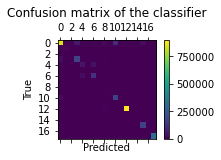

In [27]:
cm = confusion_matrix(y_test, pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(222)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()